

# **Fashion MNIST Classifier**



**Importing the libraries**

---



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

---



In [10]:
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')

In [11]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_train.shape

(60000, 785)

In [13]:
training = np.array(fashion_train, dtype='float32')
testing = np.array(fashion_test, dtype='float32')

**Visualizing the dataset**

---




0.0


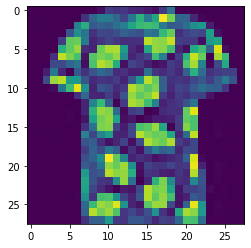

In [14]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
print(training[i, 0])


# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

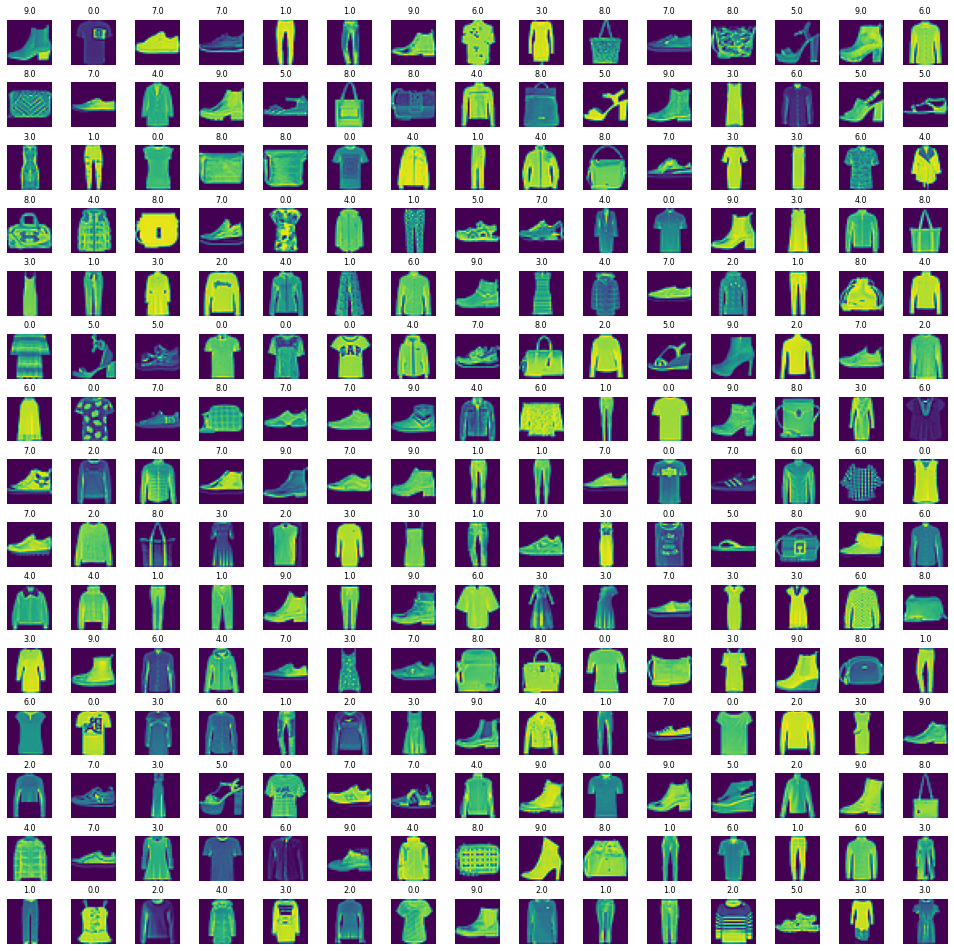

In [15]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()
n_training = len(training)


for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_training)    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

**Training the model**

---



In [16]:
X_train = training[:, 1:]/255
y_train = training[:, 0]
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape= (28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
history = model.fit(X_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/5
94/94 [==============================] - 97s 1s/step - loss: 0.7794 - accuracy: 0.7199 - val_loss: 0.4911 - val_accuracy: 0.8265
Epoch 2/5
94/94 [==============================] - 97s 1s/step - loss: 0.4666 - accuracy: 0.8313 - val_loss: 0.3999 - val_accuracy: 0.8592
Epoch 3/5
94/94 [==============================] - 97s 1s/step - loss: 0.4054 - accuracy: 0.8546 - val_loss: 0.3727 - val_accuracy: 0.8692
Epoch 4/5
94/94 [==============================] - 97s 1s/step - loss: 0.3641 - accuracy: 0.8701 - val_loss: 0.3405 - val_accuracy: 0.8799
Epoch 5/5
94/94 [==============================] - 96s 1s/step - loss: 0.3417 - accuracy: 0.8760 - val_loss: 0.3195 - val_accuracy: 0.8849


**Evaluating the model**


---



In [32]:
evaluation = model.evaluate(X_test, y_test)
evaluation

313/313 [==============================] - 6s 18ms/step - loss: 0.3099 - accuracy: 0.8884


[0.3098554313182831, 0.8884000182151794]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


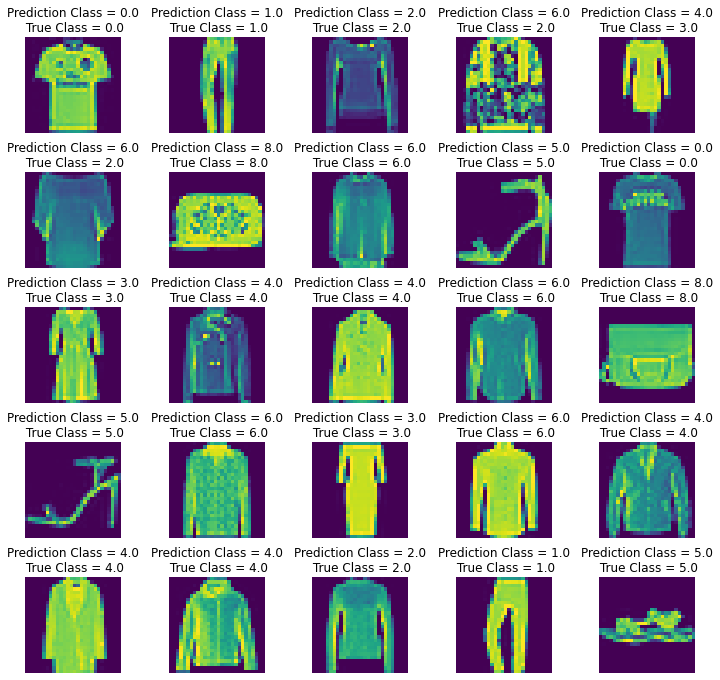

In [33]:
y_pred = model.predict_classes(X_test)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

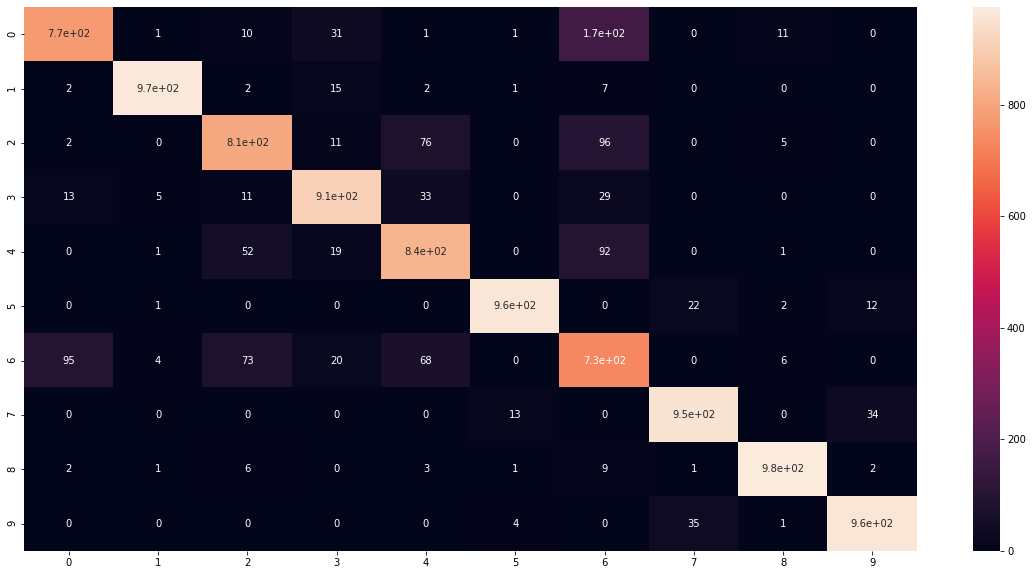

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True)

In [35]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.77      0.82      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.84      0.81      0.82      1000
     Class 3       0.90      0.91      0.91      1000
     Class 4       0.82      0.83      0.83      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.64      0.73      0.69      1000
     Class 7       0.94      0.95      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

